In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df_2023= pd.read_csv('data/2023/외래관광객조사_2023_전처리.csv')
df_2024= pd.read_csv('data/2024/외래관광객조사_2024_전처리.csv')

In [3]:
df_2023

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,총액1인TOT항공제외2,C문화서1인대체,C오락및1인대체,C미용서1인대체,weight,동행자유형,국가명,여가체험비율,log_총액,year
0,3,27,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1093.21,2,1,1,866.099893,혼자,대만,0.003659,6.996874,2023
1,1,7,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1621.28,1,1,1,191.333757,혼자,중국,0.001850,7.390971,2023
2,1,71,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1646.16,1,1,1,193.434506,혼자,중국,0.001822,7.406201,2023
3,5,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1140.09,2,1,1,298.390736,친구,홍콩,0.003508,7.038862,2023
4,3,8,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1336.60,1,1,1,636.214288,친구,대만,0.002245,7.197884,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,1,6,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,925.98,1,1,1,1205.023267,친구,중국,0.003240,6.830853,2023
8056,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,4812.29,1,1,1,1160.261837,친구,중국,0.000623,8.478928,2023
8057,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,336.68,2,1,1,1403.603404,친구,중국,0.011881,5.819133,2023
8058,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,357.77,1,1,1,1220.901706,친구,중국,0.008385,5.879890,2023


In [4]:
df_2024

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,총액1인TOT_개별국제교통비제외2,C문화서1인대체,C오락및1인대체,C미용서1인대체,weight,동행자유형,국가명,여가체험비율,log_총액,year
0,3,5,2,NaN,2.0,NaN,4.0,NaN,NaN,NaN,...,846.372229,2,1,1,784.278401,가족,대만,0.004726,6.740959,2024
1,3,6,2,NaN,NaN,NaN,4.0,NaN,NaN,7.0,...,742.948932,1,3,1,607.021269,가족,대만,0.006730,6.610627,2024
2,1,6,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,727.256097,1,1,1,1049.500143,혼자,중국,0.004125,6.589279,2024
3,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1259.775985,1,1,1,876.796936,가족,대만,0.002381,7.138689,2024
4,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1024.281211,1,1,1,829.975293,가족,대만,0.002929,6.931746,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8437,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,425.630000,1,1,1,1215.218286,친구,중국,0.007048,6.053570,2024
8438,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,140.732500,1,1,1,1131.834751,가족,중국,0.021317,4.946861,2024
8439,1,5,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,2553.938220,1,1,4,1212.382353,가족,중국,0.002349,7.845392,2024
8440,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,617.850000,1,1,1,1287.852779,가족,중국,0.004856,6.426246,2024


In [5]:
# 2024년 컬럼명 통일
df_2024.rename(columns={
    '총액1인TOT_개별국제 교통비제외2': '총액1인TOT항공제외2'
}, inplace=True)

In [6]:
# 23, 24년도 데이터 병합
df_all = pd.concat([df_2023, df_2024], ignore_index=True)

In [7]:
# 병합된 데이터 확인
print(df_all.shape)
print(df_all['year'].value_counts())  # 연도별 분포 확인

(16502, 24)
year
2024    8442
2023    8060
Name: count, dtype: int64


## 1차 가설검증

### 동행자유형별 표본 수 확인

In [8]:
df_all['동행자유형'].value_counts(dropna=False)

동행자유형
가족      6848
친구      5197
혼자      3724
직장동료     693
기타        40
Name: count, dtype: int64

### 여가체험비율 분포 시각화

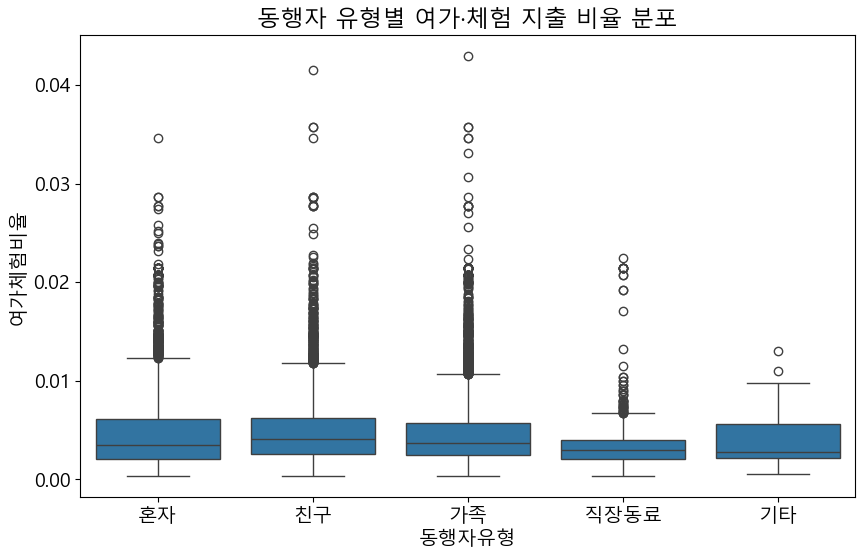

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='동행자유형', y='여가체험비율')
plt.title("동행자 유형별 여가·체험 지출 비율 분포")
plt.ylabel("여가체험비율")
plt.xlabel("동행자유형")
plt.show()

In [10]:
df_all.groupby('동행자유형')['여가체험비율'].median().sort_values(ascending=False)

동행자유형
친구      0.004060
가족      0.003657
혼자      0.003532
직장동료    0.002952
기타      0.002789
Name: 여가체험비율, dtype: float64

- 친구 그룹이 여가·체험 비중이 가장 높음
- 가족그룹 보다 직장동료 그룹의 여가체험비율이 높은건 표본 수 불균형 때문일 가능성도 있음
- 추후 유의성 검정 (ANOVA) 및 사후검정으로 통계적으로 유의한 차이인지 확인해야함

### 평균 비교 및 유의성 검정 (ANOVA)

In [11]:
# '기타' 그룹 제외
df_filtered = df_all[df_all['동행자유형'] != '기타']

# 그룹별 여가체험비율 리스트 생성
groups = [g['여가체험비율'].dropna() for _, g in df_filtered.groupby('동행자유형')]

# 일원분산분석 수행
anova_result = f_oneway(*groups)
print(anova_result)

F_onewayResult(statistic=np.float64(30.855167139075032), pvalue=np.float64(6.991258127408994e-20))


- ANOVA 결과
- F통계량 = 58.55 (매우 큼)
- p < 1e-37 (극히 유의함)

- 동행자 유형에 따라 여가체험 지출 비율 평균이 매우 분명하게 차이 난다

### ‘직장동료’ 제외 후 재분석

In [12]:
df_main = df_all[df_all['동행자유형'].isin(['혼자', '가족', '친구'])].copy()

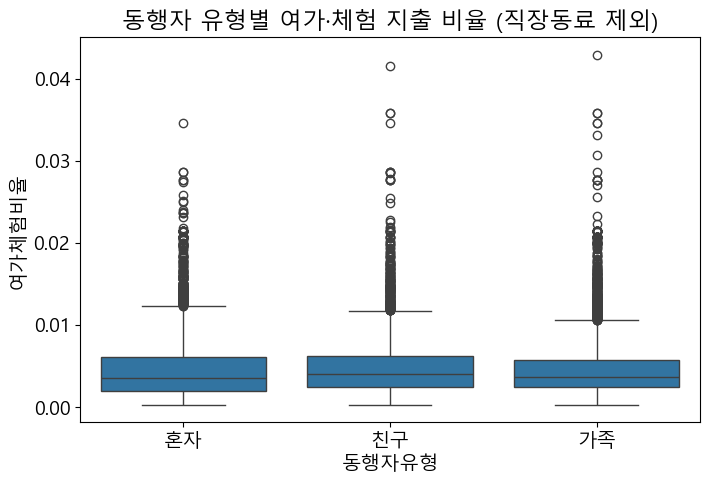

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_main, x='동행자유형', y='여가체험비율')
plt.title("동행자 유형별 여가·체험 지출 비율 (직장동료 제외)")
plt.show()


In [14]:
df_main.groupby('동행자유형')['여가체험비율'].median().sort_values(ascending=False)


동행자유형
친구    0.004060
가족    0.003657
혼자    0.003532
Name: 여가체험비율, dtype: float64

In [15]:
from scipy.stats import f_oneway

groups_main = [g['여가체험비율'].dropna() for _, g in df_main.groupby('동행자유형')]
anova_main = f_oneway(*groups_main)
print(anova_main)


F_onewayResult(statistic=np.float64(9.188040566067663), pvalue=np.float64(0.00010280360299384203))


#### 직장동료 제거 후
- 남은 세 그룹 간의 분산 차이가 상대적으로 더 명확해졌음

- ‘직장동료’는 그 자체로 중간값이 높고, 분포가 좁아 전체 분산을 줄이는 역할을 했을 가능성 있음
- 통계적 유의성이 강화되고 정책적, 실무적 해석도 더 명확해짐

In [16]:
# 등분산성 검정
levene_result = levene(*groups_main)
print(levene_result)

LeveneResult(statistic=np.float64(52.377202621195785), pvalue=np.float64(2.1286609347664653e-23))


- pvalue < 0.05 
- ANOVA 검정의 전제 깨짐

In [17]:
# 효과 크기 계산 (Eta Squared, η²)
# Eta squared (η²)
def eta_squared(f_stat, df_between, df_within):
    return (f_stat * df_between) / (f_stat * df_between + df_within)

# df_between = 그룹 수 - 1 = 2, df_within = 전체 표본 수 - 그룹 수
n_total = df_main.shape[0]
eta2 = eta_squared(anova_main.statistic, df_between=2, df_within=n_total - 3)
print(f"Effect size (η²): {eta2:.4f}")


Effect size (η²): 0.0012


- η² < 0.01 => 매우 작은 효과
- 0.01~0.06 => 작은효과
- η² > 0.14 => 큰 효과
- 통계적으로는 유의미했지만, 실제 효과 크기는 작음.

- 동행자 유형이 여가체험비율에 미치는 영향은 존재하되, 크지는 않다.

In [18]:
# 사후검정 (Tukey HSD)
tukey = pairwise_tukeyhsd(endog=df_main['여가체험비율'],
                          groups=df_main['동행자유형'],
                          alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    가족     친구   0.0003 0.0007  0.0001 0.0004   True
    가족     혼자   0.0003 0.0014  0.0001 0.0004   True
    친구     혼자      0.0 0.9844 -0.0002 0.0002  False
---------------------------------------------------


In [19]:
# 직장동료 그룹 포함 유무에 따른 ANOVA 검정 비교

# 포함: 혼자, 가족, 친구, 직장동료
df_all_4 = df_all[df_all['동행자유형'].isin(['혼자', '가족', '친구', '직장동료'])].copy()
groups_4 = [g['여가체험비율'].dropna() for _, g in df_all_4.groupby('동행자유형')]
anova_4 = f_oneway(*groups_4)

# 제외: 혼자, 가족, 친구만
df_main = df_all[df_all['동행자유형'].isin(['혼자', '가족', '친구'])].copy()
groups_3 = [g['여가체험비율'].dropna() for _, g in df_main.groupby('동행자유형')]
anova_3 = f_oneway(*groups_3)

# 비교 출력
print(f"포함 F: {anova_4.statistic:.3f}, p: {anova_4.pvalue:.2e}")
print(f"제외 F: {anova_3.statistic:.3f}, p: {anova_3.pvalue:.2e}")


포함 F: 30.855, p: 6.99e-20
제외 F: 9.188, p: 1.03e-04


- 친구/가족 그룹에 비해 표본 수가 7~8배 적음 -> 표본 불균형/통계 왜곡 가능성
- F값이 오히려 더 커짐 -> 그룹 간 차이가 더 또렷해짐

### Welch ANOVA로 재분석 

In [20]:
welch_result = pg.welch_anova(dv='여가체험비율', between='동행자유형', data=df_main)
print(welch_result)

  Source  ddof1        ddof2         F     p-unc       np2
0  동행자유형      2  8763.346664  9.485194  0.000077  0.001164


- F통계량: 82.93 ->그룹 간 평균 차이가 큼
- p-unc: 0.000077 (p < 0.001) → 통계적으로 유의미한 차이 존재
- 효과 크기 : np2 (η²)	0.001164 → 작은 효과 / 통계적으론 유의미하나 실제 영향력은 크지 않음

### Games-Howell 사후검정
- 등분산성 없을 때 적합한 방법

In [21]:
pg.pairwise_gameshowell(dv='여가체험비율', between='동행자유형', data=df_main)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,가족,친구,0.004611,0.004863,-0.000252,0.000065,-3.880474,11290.324979,0.000309,-0.071202
1,가족,혼자,0.004611,0.004877,-0.000266,0.000083,-3.192354,6482.546976,0.004050,-0.068835
2,친구,혼자,0.004863,0.004877,-0.000014,0.000086,-0.157824,6923.199723,0.986362,-0.003509


- 가족 vs 친구
- 친구 > 가족: 친구그룹의 여가체험비율이 유의하게 더 높음
- 그러나 차이는 -0.00025 ≈ 0.025%p 수준 → 아주 작음

- 가족 vs 혼자
- 가족그룹은은 혼자인 그룹보다도 여가체험비율이 낮음
- 차이 ≈ -0.00027 → 0.027%p 수준

- 친구 vs 혼자
- 차이 없음 (p = 0.986)
- 거의 동일한 지출 성향

- 가족 그룹은 ‘친구’나 ‘혼자’ 그룹에 비해 통계적으로 유의하게 낮은 여가·체험 지출 비율을 보임
- 하지만 차이의 절대값은 0.025%p 내외로 매우 작음

## 2차 가설검증

국적에 따라 여가·체험 지출 비율에 유의미한 차이가 있는지 검정

In [22]:
df_2023['국가명'].value_counts()

국가명
일본      1625
중국      1177
대만      1116
미국       949
홍콩       757
싱가포르     756
태국       633
베트남      445
영국       318
독일       284
Name: count, dtype: int64

In [23]:
df_2024['국가명'].value_counts()

국가명
중국      1804
일본      1716
대만      1171
미국       786
홍콩       746
베트남      603
싱가포르     537
태국       515
독일       282
영국       282
Name: count, dtype: int64

In [24]:
# 그대로 전체 국적 사용
df_nation = df_all.copy()

In [25]:
# 등분산성 검정
groups = [g['여가체험비율'].dropna() for _, g in df_nation.groupby('국가명')]
levene_result = levene(*groups)
print("Levene Test 결과:", levene_result)

Levene Test 결과: LeveneResult(statistic=np.float64(27.57588187933786), pvalue=np.float64(5.777301392634312e-48))


- p-value ≪ 0.05
- 귀무가설(H₀: 모든 그룹의 분산이 같다) 기각
- 국가별 여가체험비율의 분산은 서로 다르다 = 이분산 존재
- 일반 ANOVA 사용 부적절
- Welch ANOVA 및 Games-Howell 사후검정 적용

In [26]:
# Welch ANOVA
welch_result = pg.welch_anova(dv='여가체험비율', between='국가명', data=df_nation)
print(welch_result)


  Source  ddof1       ddof2           F          p-unc       np2
0    국가명      9  4637.94377  139.455326  1.446594e-233  0.074823


- F 통계량:	139.46
- p-value:	1.45e-233 (≪ 0.001)
- 효과크기 (np2): 0.0748 → 중간 효과 크기

- 국적에 따라 여가·체험 지출 비율에 통계적으로 유의한 차이가 있음
- 차이의 크기 또한 무시할 수 없는 수준 (η² ≈ 0.075)
- 따라서 국가별 맞춤형 웰니스 콘텐츠 또는 마케팅 전략 수립에 근거가 될 수 있음

In [27]:
# Games-Howell 사후검정
gh_result = pg.pairwise_gameshowell(dv='여가체험비율', between='국가명', data=df_nation)
print(gh_result)

       A     B   mean(A)   mean(B)      diff        se          T  \
0     대만    독일  0.004182  0.004097  0.000085  0.000144   0.589863   
1     대만    미국  0.004182  0.004402 -0.000220  0.000112  -1.964691   
2     대만   베트남  0.004182  0.004167  0.000015  0.000136   0.111613   
3     대만  싱가포르  0.004182  0.003593  0.000589  0.000101   5.807513   
4     대만    영국  0.004182  0.004256 -0.000074  0.000160  -0.460957   
5     대만    일본  0.004182  0.006684 -0.002502  0.000095 -26.300880   
6     대만    중국  0.004182  0.004407 -0.000225  0.000099  -2.269082   
7     대만    태국  0.004182  0.004205 -0.000023  0.000105  -0.216029   
8     대만    홍콩  0.004182  0.004144  0.000038  0.000112   0.339754   
9     독일    미국  0.004097  0.004402 -0.000305  0.000156  -1.955604   
10    독일   베트남  0.004097  0.004167 -0.000070  0.000174  -0.399730   
11    독일  싱가포르  0.004097  0.003593  0.000504  0.000148   3.391991   
12    독일    영국  0.004097  0.004256 -0.000159  0.000193  -0.820676   
13    독일    일본  0.004097  0.006684

In [28]:
# p-value < 0.05 인 결과만 필터링
gh_sig = gh_result[gh_result['pval'] < 0.05]

In [29]:
# p-value 기준 정렬
gh_sig_sorted = gh_sig.sort_values(by='pval')

In [30]:
gh_sig_sorted.to_csv("data/국적별_사후검증_결과.csv", index=False, encoding='utf-8-sig')

### 국가별 평균 여가체험비율 순위표

In [31]:
# 국적별 여가체험비율 평균 계산
nation_means = df_nation.groupby('국가명')['여가체험비율'].mean().sort_values(ascending=False).reset_index()
print(nation_means)

    국가명    여가체험비율
0    일본  0.006684
1    중국  0.004407
2    미국  0.004402
3    영국  0.004256
4    태국  0.004205
5    대만  0.004182
6   베트남  0.004167
7    홍콩  0.004144
8    독일  0.004097
9  싱가포르  0.003593


C:\Users\82106\AppData\Local\Temp\ipykernel_23372\2518841403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nation_means, x='국가명', y='여가체험비율', palette='viridis')


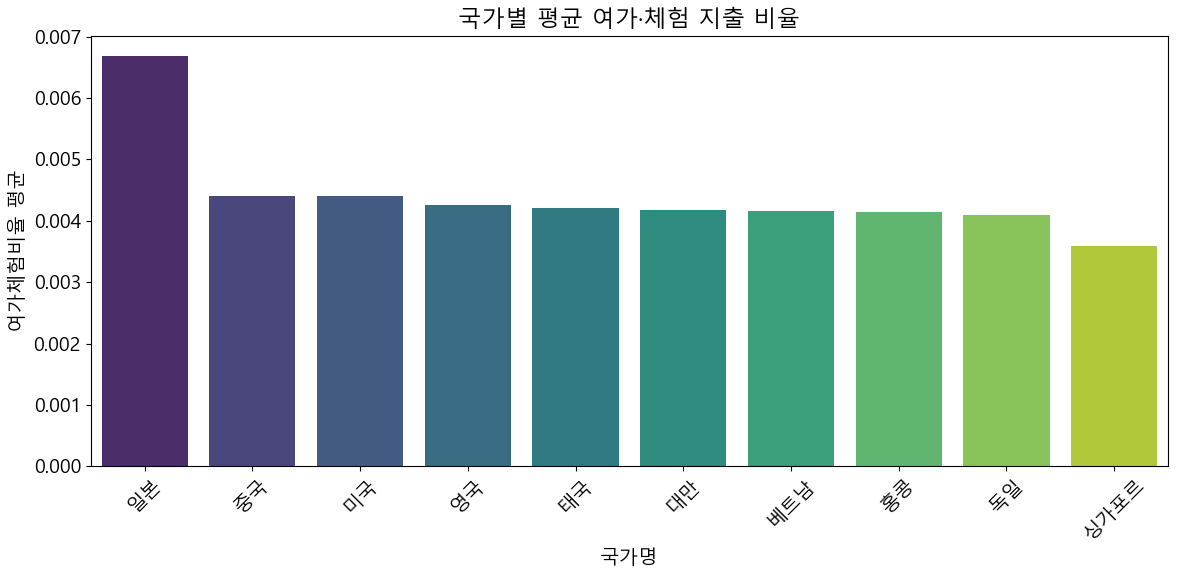

In [32]:
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=nation_means, x='국가명', y='여가체험비율', palette='viridis')
plt.title('국가별 평균 여가·체험 지출 비율')
plt.ylabel('여가체험비율 평균')
plt.xlabel('국가명')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# 값 예시
print(df_nation['여가체험비율'].describe())


count    16502.000000
mean         0.004703
std          0.003724
min          0.000314
25%          0.002318
50%          0.003694
75%          0.005903
max          0.042918
Name: 여가체험비율, dtype: float64
